In [113]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

matplotlib.rcParams['axes.unicode_minus'] = False 
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # : windows 사용자용
matplotlib.rcParams['font.size'] = '10' 

In [114]:
# [ 도미 ]
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0,
33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

#[ 빙어 ]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [46]:
len(bream_length)
len(smelt_length)

14

In [ ]:
# 데이터의 전처리 과정 실현
# train_input, train_target, test_input, test_target
# 도미 : 1, 빙어 : 0
# results = [1]*35, [0]*14
# datas =  [length, weight, results ] 합치기
# results : 1,1,1,1,..... 35개, 0,0,0,0..... 14개
# random 함수를 사용해서 총 49개 중 35개 데이터는 train_input, train_target / 14개 데이터는 test_input, test_target

In [72]:
# length -> 합치기(bream_length,smelt_length)
# weight -> 합치기(bream_weight, smelt_weight) 
length = bream_length + smelt_length
length
weight = bream_weight + smelt_weight
weight
results = [1]*35 + [0]*14
results

# zip() : 반복해서 각각 list데이터를 1개씩 뽑아서 전달해 줌

# datas =  [length, weight, results ] 합치기
datas = [[l,w,r] for l,w,r in zip(length,weight,results)] 
# datas = [[l,w] for l,w in zip(length,weight)] 

### 1. 판다스로 데이터 전처리

In [ ]:
df = pd.DataFrame(datas)

In [65]:
# 랜덤숫자 생성
idx = [i for i in range(49)]
random.shuffle(idx)
# idx

In [ ]:
# 참고 : 섞이지 않은 데이터
datas[:35]  
datas[35:]

In [ ]:
# 참고 : 파이썬
datas = [0]*49
for i in range(0,49):
    datas[i] = [length[i],weight[i]]
  
print(datas)

#### 데이터 전처리 완료

In [69]:
train_input = df.iloc[idx[:35],:-1]
test_input = df.iloc[idx[35:],:-1]
train_target = df.iloc[idx[:35],2]
test_target = df.iloc[idx[35:],2]

#### K-NN  /   SVM

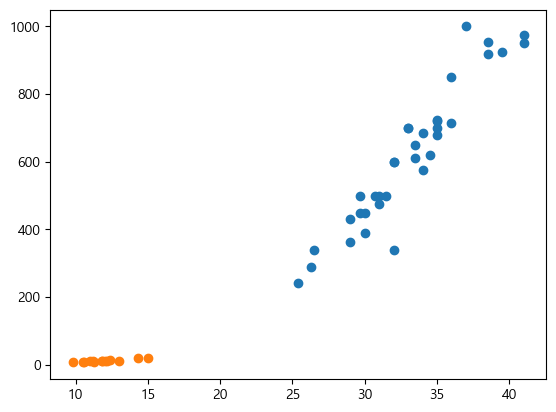

In [134]:
plt.scatter(bream_length,bream_weight)
plt.scatter(smelt_length,smelt_weight)

### 2. 판다스를 사용하지 않은 데이터 전처리

In [146]:
# for 문을 사용해서 35,14개를 분리해서 출력

length = bream_length + smelt_length
weight = bream_weight + smelt_weight
results = [1]*35 + [0]*14

# datas = [[l,w,r] for l,w,r in zip(length,weight,results)] 
datas = [[l,w] for l,w in zip(length,weight)] 

In [147]:
# 랜덤숫자 생성
idx = [i for i in range(49)]
random.shuffle(idx)
# idx

In [148]:
train_input = [datas[i] for i in idx[:35]]
test_input = [datas[i] for i in idx[35:]]
train_target = [results[i] for i in idx[:35]]
test_target = [results[i] for i in idx[35:]]

In [149]:
df_train= pd.DataFrame(train_input)
df_train.head(1)
df_test= pd.DataFrame(test_input)
df_test.head(1)

,0,1
0,37.0,1000.0


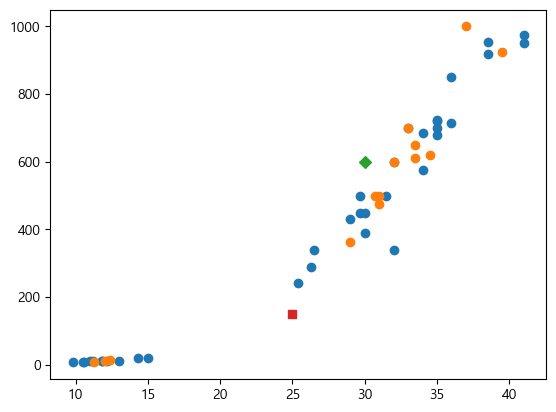

In [150]:
plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])
plt.scatter(30,600,marker='D')
plt.scatter(25,150,marker='s')

In [151]:
# 데이터 학습하기
from sklearn.neighbors import KNeighborsClassifier

# clf= svm.SVC()
clf = KNeighborsClassifier()
clf.fit(train_input, train_target)

# 데이터 예측하기
pre = clf.predict(test_input)
print("예측데이터 값 : ", pre)

예측데이터 값 :  [1 0 1 1 1 1 1 0 1 0 1 1 1 1]


### 표준편차 적용

In [152]:
distances, indexs = clf.kneighbors([[25,150]])

In [153]:
df_train

,0,1
0,14.3,19.7
1,13.0,12.2
2,36.0,850.0
3,29.0,430.0
4,9.8,6.7
5,11.0,9.7
6,35.0,720.0
7,15.0,19.9
8,11.8,9.9
9,29.7,450.0


In [154]:
indexs

array([[32,  7,  0,  1, 12]], dtype=int64)

In [155]:
df_train.iloc[indexs[0],0]

32    25.4
7     15.0
0     14.3
1     13.0
12    12.2
Name: 0, dtype: float64

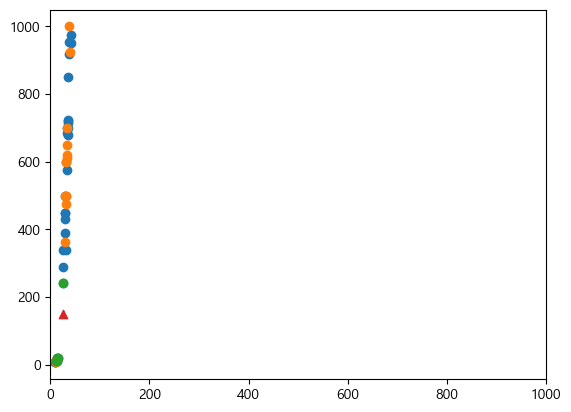

In [156]:
plt.xlim(0,1000)
plt.scatter(df_train[0],df_train[1])
plt.scatter(df_test[0],df_test[1])
plt.scatter(df_train.iloc[indexs[0],0], df_train.iloc[indexs[0],1])
plt.scatter(25,150,marker='^')

In [157]:
# 정답률
score = clf.score(test_input,test_target)
print("정답률 :", score)

정답률 : 1.0


In [158]:
# 길이 30, 무게 600 고기는 무엇인지 판단
pre = clf.predict([[30,600]])
print(pre)

[1]


In [159]:
# 길이 25, 무게 150 => 1에 가까움에도 불구하고 0으로 판단될 수 있음
pre = clf.predict([[25,150]])
print(pre)

[0]
